# Homework 1
If you have any questions please send an email to the TA Ahmet Tavlı (ahmet.tavli@ozu.edu.tr) (Office hours: Monday 245A 16.00 - 18.00)

# Step 1: Load and analyze the data

## Step 1.a Load the two datasets ##

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
# First, let's check whether the training and the test files exist in our file.
from os.path import exists
import pandas as pd

train_data = "/content/drive/MyDrive/CS304/HW1/titanictrain.csv"
test_data = "/content/drive/MyDrive/CS304/HW1/titanictest.csv"

# - Supress all warnings (Optional)
import warnings
warnings.simplefilter(action='ignore',
                      category=FutureWarning)

if exists(train_data) and exists(test_data):
    print(f"\nBoth {train_data} and {test_data} exists.")
else:
    print("Please set directory to read the files")


Both /content/drive/MyDrive/CS304/HW1/titanictrain.csv and /content/drive/MyDrive/CS304/HW1/titanictest.csv exists.


In [115]:
# Let's load the training and the test data and display their types.
# Hint!: you can use the read_csv from pandas and type built-in method

import pandas as pd
from pandas import read_csv

train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

##Step 1.b Display the shape of both training and test data.##

The shape of each data shows a summary of the dataset.

For example, "(890, 12)" should be interpreted as 890 samples with ten features, where

890 is the row size (or height of the data)
12 is the column size (or width of the data)

**Hint!**: You can use the shape method

In [116]:
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (891, 12)
Test shape: (418, 11)


## Step 1.c Display the first five rows of training and test data ##

In [117]:
print("\nTraining data:")
train_df.head()


Training data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
print("\nTest data:")
test_df.head()


Test data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Step 1.e Determine which column exists in the training set but is missing in the test set ##

Training and test sets have different number of features (columns).

In Step 1.b you saw that the traind_df has 12 columns bur test_df has 11 columns

We need to find which column is missing in the test data.

**Hint!**: You can access the features using keys method.

**Hint!**: Iterate through the keys of training samples, and check if it is in the set of test features.

In [119]:
missing_columns = set(train_df.columns) - set(test_df.columns)
print("Columns missing in test dataset:", missing_columns)

Columns missing in test dataset: {'Survived'}


## Step 1.f Observe the datatype of each column using the .info() method ##

In [120]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [123]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Step 1.g. Determine the number and percentage of passengers who survived. ##

In [124]:
survived_passengers = train_df[train_df['Survived'] == 1]
survival_percentage = len(survived_passengers) / len(train_df) * 100
print("Number of passengers who survived:", len(survived_passengers))
print("Percentage of passengers who survived:", survival_percentage)

Number of passengers who survived: 342
Percentage of passengers who survived: 38.38383838383838


# Step 2: Prepare the data for classification #

## Step 2.a Extract the target label (i.e. "Survived") from the training set and assign it to the variable "y_train" ##

In [125]:
y_train = train_df['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Step 2.b Copy the columns "Pclass","Sex", "Age", "Fare" to a new dataframe##

Name the new dataframe as x_train
Display the top 5 rows of x_train

In [126]:
x_train = train_df[['Pclass', 'Sex', 'Age', 'Fare']].copy()
x_train.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


## Step 2.c Add a new feature "FamilySize" ##

"Sibsp" and "Parch" features are related.

Instead of using them separately, we can use their sum as a feature.

**Hint!**: We can add the sum as a new column to the new data frame object as new_df['FamilySize'] = Sibsp + Parch

**Hint!:** We can also limit the sum so that it does not exceed 4. (For this purpose one option is use the apply method.)

Display the first five rows of x_train

In [127]:
x_train['FamilySize'] = train_df['SibSp'] + train_df['Parch']
x_train['FamilySize'] = x_train['FamilySize'].clip(upper=4) # includes 4

print("x_train:")
x_train.head()

x_train:


,Pclass,Sex,Age,Fare,FamilySize
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


## Step 2.g. Use a pipeline to implement Steps 2.d,e,f. OR implement them one-by-one. ##  

2.d.

In [128]:
x_train['Sex'] = x_train['Sex'].map({'male': 0, 'female': 1})

print("train_df with 'Sex' column transformed to numerical values:")
x_train.head()

train_df with 'Sex' column transformed to numerical values:


,Pclass,Sex,Age,Fare,FamilySize
0,3,0,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


In [129]:
x_train.isnull().sum()

Pclass          0
Sex             0
Age           177
Fare            0
FamilySize      0
dtype: int64

### 2.e.i. Fill with Zeros

In [130]:
x_train_zeros = x_train.copy()

x_train_zeros['Fare'] = x_train_zeros['Fare'].fillna(0)
x_train_zeros['Age'] = x_train_zeros['Age'].fillna(0)

x_train_zeros.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
FamilySize    0
dtype: int64

### 2.e.i. Fill with Mean

In [131]:
fare_mean = x_train['Fare'].mean()
age_mean = x_train['Age'].mean()

# Mean
x_train_mean = x_train.fillna({'Fare': fare_mean, 'Age': age_mean})
x_train_mean.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
FamilySize    0
dtype: int64

### 2.e.i. Fill with Median

In [132]:
fare_median = x_train['Fare'].median()
age_median = x_train['Age'].median()

# Mean
x_train_median = x_train.fillna({'Fare': fare_median, 'Age': age_median})
x_train_median.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
FamilySize    0
dtype: int64

### 2.e.ii.

In [133]:
group_means = train_df.groupby(['Sex', 'Pclass']).mean()
group_means.rename(columns={'Age': 'Mean_Age', 'Fare': 'Mean_Fare'}, inplace=True)
group_means.name = "AgeMean"
group_means.head()

PassengerId  Survived   Mean_Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   

                Mean_Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782

In [134]:
x_train_KNN = x_train.copy()


merged_data = pd.merge(train_df, group_means, on=['Sex', 'Pclass'], how='left')

merged_data['Age'] = merged_data['Age'].fillna(merged_data['Mean_Age'])
merged_data['Fare'] = merged_data['Fare'].fillna(merged_data['Mean_Fare'])

merged_data = merged_data.drop(['Mean_Age', 'Mean_Fare'], axis=1)

print("Merged data:")
merged_data.head()

Merged data:


,PassengerId_x,Survived_x,Pclass,Name,Sex,Age,SibSp_x,Parch_x,Ticket,Fare,Cabin,Embarked,PassengerId_y,Survived_y,SibSp_y,Parch_y
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,455.515850,0.135447,0.498559,0.224784
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,469.212766,0.968085,0.553191,0.457447
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,399.729167,0.500000,0.895833,0.798611
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,469.212766,0.968085,0.553191,0.457447
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,455.515850,0.135447,0.498559,0.224784


In [135]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical features to scale
numerical_features = ['Fare', 'Age']

x_train_med_minmax = x_train_median.copy()


# Create the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the selected features
x_train_med_minmax[numerical_features] = scaler.fit_transform(x_train_med_minmax[numerical_features])

# Display the updated DataFrame
print("Scaled data using MinMaxScaler and filled missing values with medians:")
x_train_med_minmax.head()

Scaled data using MinMaxScaler and filled missing values with medians:


,Pclass,Sex,Age,Fare,FamilySize
0,3,0,0.271174,0.014151,1
1,1,1,0.472229,0.139136,1
2,3,1,0.321438,0.015469,0
3,1,1,0.434531,0.103644,1
4,3,0,0.434531,0.015713,0


### KNN Imputer

In [136]:
from sklearn.impute import KNNImputer

features_to_impute = ['Age', 'Fare']

knn_imputer = KNNImputer()

x_train_KNN = x_train.copy()

imputed_data = knn_imputer.fit_transform(x_train_KNN[features_to_impute])


x_train_KNN['Age'] = imputed_data[:, 0]
x_train_KNN['Fare'] = imputed_data[:, 1]

print("Imputed data using KNNImputer:")
x_train_KNN.head()

Imputed data using KNNImputer:


,Pclass,Sex,Age,Fare,FamilySize
0,3,0,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


### MinMaxScaler

# Step 3: Train two different ML models and compare their accuracies #
# Part 3 with x_train_mean

## Step 3.a Split into training and test set, ratio: 80/20 ##

In [137]:
from sklearn.model_selection import train_test_split

#x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_split_mean, x_test_split_mean, y_train_split, y_test_split = train_test_split(x_train_mean, y_train, test_size=0.2, random_state=42)
x_train_split_Knn, x_test_split_KNN, y_train_split, y_test_split = train_test_split(x_train_KNN, y_train, test_size=0.2, random_state=42)


# Display the shapes of the split data
print("Training features shape:", x_train_split_mean.shape)
print("Test features shape:", x_test_split_mean.shape)
print("Training target shape:", y_train_split.shape)
print("Test target shape:", y_test_split.shape)

Training features shape: (712, 5)
Test features shape: (179, 5)
Training target shape: (712,)
Test target shape: (179,)


## Step 3.b Train a logistic regression classifier and test the accuracy ##

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Create an instance of LogisticRegression
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(x_train_split_mean, y_train_split)

# Predict the labels for the test data
y_pred = logistic_model.predict(x_test_split_mean)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_split, y_pred)

print("Accuracy of Logistic Regression model:", accuracy)


Accuracy of Logistic Regression model: 0.8100558659217877


## Step 3.c Train a random forest classifier and test the accuracy ##

In [139]:
from sklearn.ensemble import RandomForestClassifier


# Create an instance of the random forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the random forest classifier
random_forest.fit(x_train_split_mean[['Sex']], y_train_split)

# Make predictions on the test set
y_pred_random_forest = random_forest.predict(x_test_split_mean[['Sex']])

# Calculate the accuracy of the random forest classifier
accuracy_random_forest = accuracy_score(y_test_split, y_pred_random_forest)
print("Accuracy of random forest classifier using x_train_split:", accuracy_random_forest)

Accuracy of random forest classifier using x_train_split: 0.7821229050279329


## Step 3.d Train a logistic regression classifier using 5-fold cross validation. ##

In [140]:
from sklearn.model_selection import cross_val_score

# Create an instance of LogisticRegression
logistic_model = LogisticRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logistic_model, x_train_mean, y_train, cv=5)

# Calculate the mean accuracy and standard deviation of the 5 folds
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

print("Mean accuracy of 5-fold cross-validation:", mean_accuracy)
print("Standard deviation of accuracy of 5-fold cross-validation:", std_accuracy)

Mean accuracy of 5-fold cross-validation: 0.7912497646098802
Standard deviation of accuracy of 5-fold cross-validation: 0.009565879653154852


## Step 3.e Train a random forest classifier using 5-fold cross validation.

In [141]:
import numpy as np

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logistic_model, x_train_mean, y_train, cv=5)

# Calculate the mean accuracy and standard deviation of the 5 folds
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print("Mean accuracy of 5-fold cross-validation:", mean_accuracy)
print("Standard deviation of accuracy of 5-fold cross-validation:", std_accuracy)


Mean accuracy of 5-fold cross-validation: 0.7912497646098802
Standard deviation of accuracy of 5-fold cross-validation: 0.009565879653154852


## Step 3.f Inspect the confusion matrices of the two classifiers ##

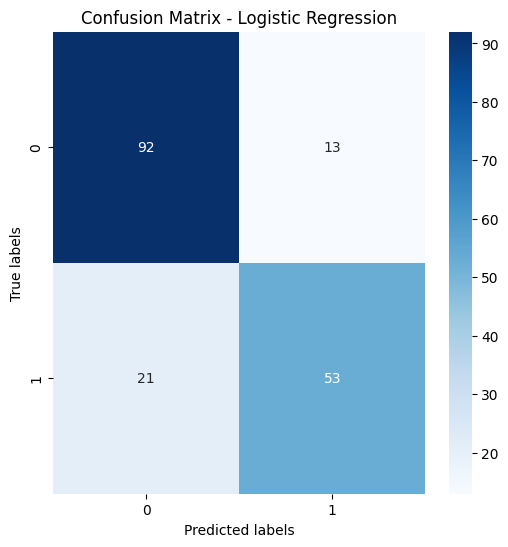

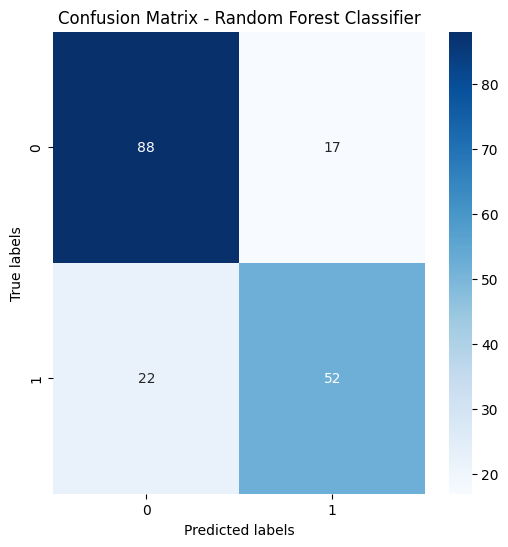

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(title)
    plt.show()

# Confusion matrix for logistic regression
logistic_cm = confusion_matrix(y_test_split, y_pred)
plot_confusion_matrix(logistic_cm, "Confusion Matrix - Logistic Regression")

# Confusion matrix for random forest classifier
random_forest_cm = confusion_matrix(y_test_split, y_pred_random_forest)
plot_confusion_matrix(random_forest_cm, "Confusion Matrix - Random Forest Classifier")

## Step 3.g Calculate the precision and recall scores of the two classifiers ##

In [143]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score for logistic regression
precision_lr = precision_score(y_test_split, y_pred)
recall_lr = recall_score(y_test_split, y_pred)
f1_lr = f1_score(y_test_split, y_pred)

print("Logistic Regression:")
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

# Calculate precision, recall, and F1 score for random forest classifier
precision_rf = precision_score(y_test_split, y_pred_random_forest)
recall_rf = recall_score(y_test_split, y_pred_random_forest)
f1_rf = f1_score(y_test_split, y_pred_random_forest)

print("\nRandom Forest Classifier:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Logistic Regression:
Precision: 0.803030303030303
Recall: 0.7162162162162162
F1 Score: 0.7571428571428571

Random Forest Classifier:
Precision: 0.7536231884057971
Recall: 0.7027027027027027
F1 Score: 0.7272727272727273


## Step 3.h Draw the precision-recall curves of the two classifiers. ##

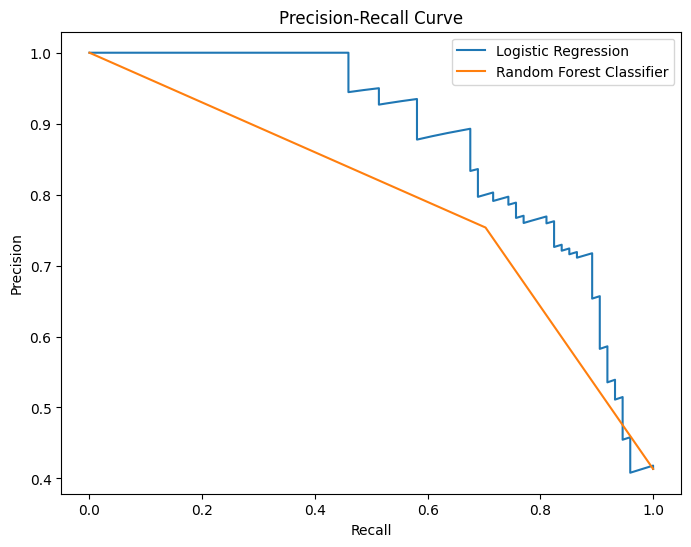

In [144]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Fit the logistic regression model
logistic_model.fit(x_train_split_mean, y_train_split)

# Calculate precision and recall for logistic regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test_split, logistic_model.predict_proba(x_test_split_mean)[:, 1])

# Calculate precision and recall for random forest classifier
precision_rf, recall_rf, _ = precision_recall_curve(y_test_split, random_forest.predict_proba(x_test_split_mean[['Sex']])[:, 1])

# Plot precision-recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, label='Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [145]:
"""from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate precision-recall curve for logistic regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test_split, y_pred)
plt.figure()
plt.step(recall_lr, precision_lr, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Calculate precision-recall curve for random forest classifier
precision_rf, recall_rf, _ = precision_recall_curve(y_test_split, y_pred_random_forest)
plt.figure()
plt.step(recall_rf, precision_rf, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest Classifier')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()
"""



"from sklearn.metrics import precision_recall_curve, roc_curve, auc\n\n# Calculate precision-recall curve for logistic regression\nprecision_lr, recall_lr, _ = precision_recall_curve(y_test_split, y_pred)\nplt.figure()\nplt.step(recall_lr, precision_lr, where='post')\nplt.xlabel('Recall')\nplt.ylabel('Precision')\nplt.title('Precision-Recall Curve - Logistic Regression')\nplt.ylim([0.0, 1.05])\nplt.xlim([0.0, 1.0])\nplt.show()\n\n# Calculate precision-recall curve for random forest classifier\nprecision_rf, recall_rf, _ = precision_recall_curve(y_test_split, y_pred_random_forest)\nplt.figure()\nplt.step(recall_rf, precision_rf, where='post')\nplt.xlabel('Recall')\nplt.ylabel('Precision')\nplt.title('Precision-Recall Curve - Random Forest Classifier')\nplt.ylim([0.0, 1.05])\nplt.xlim([0.0, 1.0])\nplt.show()\n"

## Step 3.h. Draw the ROC curves for the two classifiers and comment. ##


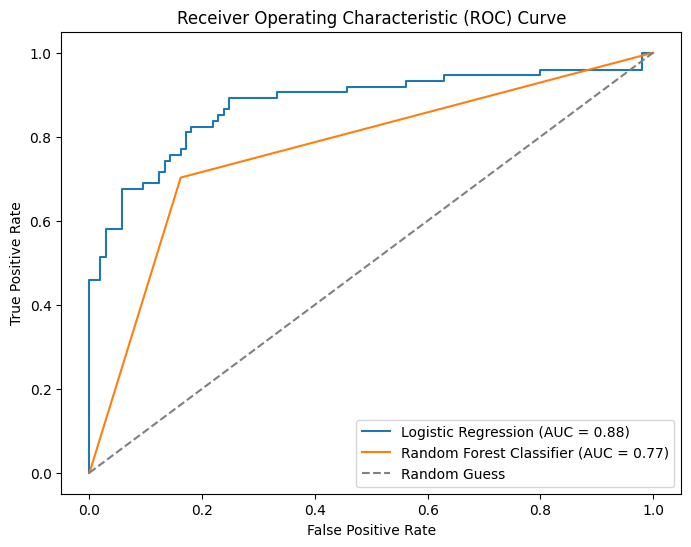

In [146]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve for logistic regression
fpr_lr, tpr_lr, _ = roc_curve(y_test_split, logistic_model.predict_proba(x_test_split_mean)[:, 1])
roc_auc_lr = roc_auc_score(y_test_split, logistic_model.predict_proba(x_test_split_mean)[:, 1])

# Calculate ROC curve for random forest classifier
fpr_rf, tpr_rf, _ = roc_curve(y_test_split, random_forest.predict_proba(x_test_split_mean[['Sex']])[:, 1])
roc_auc_rf = roc_auc_score(y_test_split, random_forest.predict_proba(x_test_split_mean[['Sex']])[:, 1])

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr_rf, tpr_rf, label='Random Forest Classifier (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Part 3 with x_train_KNN

Logistic Regression - Accuracy on test partition: 0.8212290502793296
Random Forest Classifier - Accuracy on test partition: 0.7988826815642458
Logistic Regression - Mean accuracy of 5-fold cross-validation: 0.7946268281965978
Logistic Regression - Standard deviation of accuracy of 5-fold cross-validation: 0.008772743553718864
Random Forest Classifier - Mean accuracy of 5-fold cross-validation: 0.8137530600715588
Random Forest Classifier - Standard deviation of accuracy of 5-fold cross-validation: 0.03518646435907587


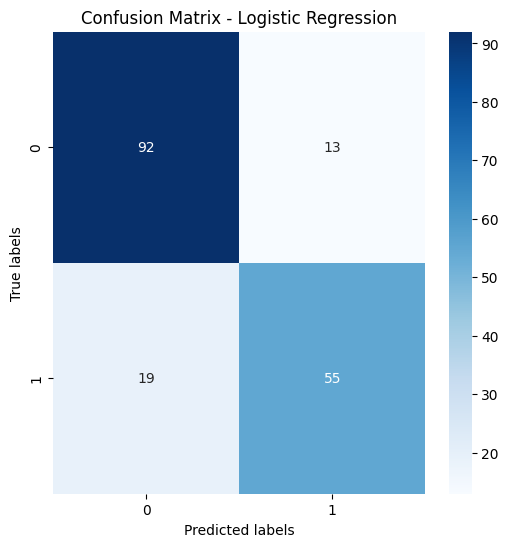

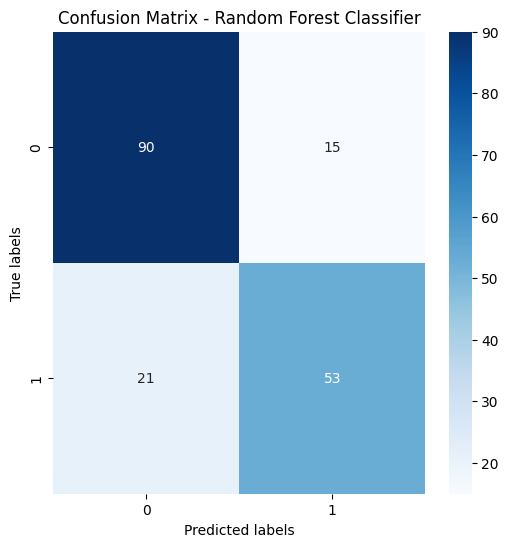

Logistic Regression - Precision: 0.8088235294117647
Logistic Regression - Recall: 0.7432432432432432
Logistic Regression - F1 Score: 0.7746478873239436
Random Forest Classifier - Precision: 0.7794117647058824
Random Forest Classifier - Recall: 0.7162162162162162
Random Forest Classifier - F1 Score: 0.7464788732394366


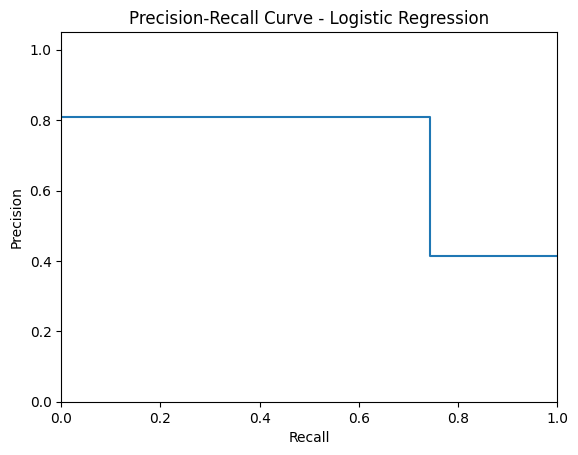

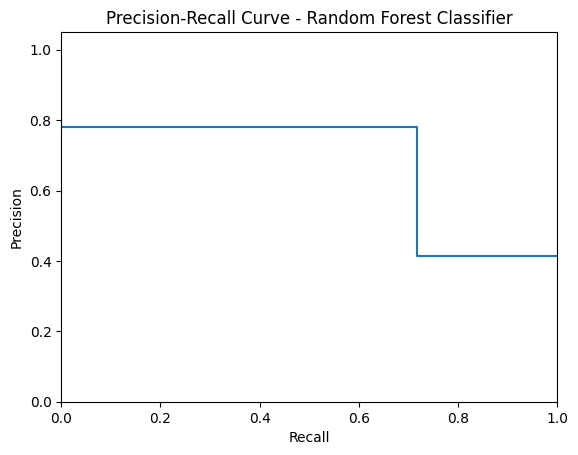

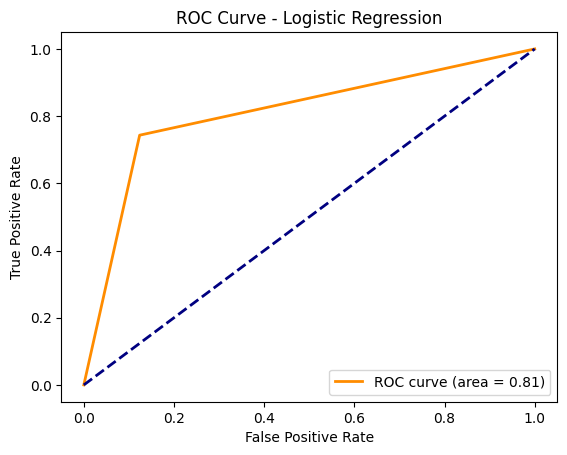

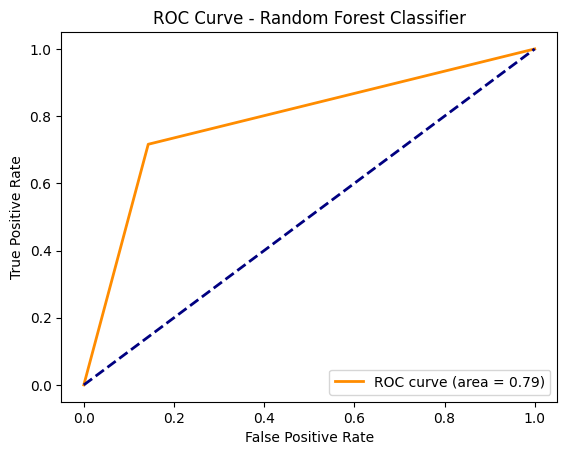

In [147]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and test sets
x_train_split_Knn, x_test_split_KNN, y_train_split, y_test_split = train_test_split(x_train_KNN, y_train, test_size=0.2, random_state=42)

# b. Train a logistic regression classifier on the training partition and report the accuracy on the test partition
logistic_model = LogisticRegression()
logistic_model.fit(x_train_split_Knn, y_train_split)
y_pred_lr = logistic_model.predict(x_test_split_KNN)
accuracy_lr = accuracy_score(y_test_split, y_pred_lr)
print("Logistic Regression - Accuracy on test partition:", accuracy_lr)

# c. Train a random forest classifier on the training partition and report the accuracy on the test partition
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train_split_Knn, y_train_split)
y_pred_rf = random_forest.predict(x_test_split_KNN)
accuracy_rf = accuracy_score(y_test_split, y_pred_rf)
print("Random Forest Classifier - Accuracy on test partition:", accuracy_rf)

# d. Repeat b. using 5-fold cross-validation. Calculate the mean accuracy of the 5 folds and the standard deviation
cv_scores_lr = cross_val_score(logistic_model, x_train_KNN, y_train, cv=5)
mean_accuracy_lr = cv_scores_lr.mean()
std_accuracy_lr = cv_scores_lr.std()
print("Logistic Regression - Mean accuracy of 5-fold cross-validation:", mean_accuracy_lr)
print("Logistic Regression - Standard deviation of accuracy of 5-fold cross-validation:", std_accuracy_lr)

# e. Repeat c. using 5-fold cross-validation. Calculate the mean accuracy of the 5 folds and the standard deviation
cv_scores_rf = cross_val_score(random_forest, x_train_KNN, y_train, cv=5)
mean_accuracy_rf = cv_scores_rf.mean()
std_accuracy_rf = cv_scores_rf.std()
print("Random Forest Classifier - Mean accuracy of 5-fold cross-validation:", mean_accuracy_rf)
print("Random Forest Classifier - Standard deviation of accuracy of 5-fold cross-validation:", std_accuracy_rf)

# f. Inspect and draw the confusion matrices of the two classifiers
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(title)
    plt.show()

cm_lr = confusion_matrix(y_test_split, y_pred_lr)
cm_rf = confusion_matrix(y_test_split, y_pred_rf)
plot_confusion_matrix(cm_lr, "Confusion Matrix - Logistic Regression")
plot_confusion_matrix(cm_rf, "Confusion Matrix - Random Forest Classifier")

# g. Calculate the precision, recall, and F1 scores for the two classifiers
precision_lr = precision_score(y_test_split, y_pred_lr)
recall_lr = recall_score(y_test_split, y_pred_lr)
f1_lr = f1_score(y_test_split, y_pred_lr)
print("Logistic Regression - Precision:", precision_lr)
print("Logistic Regression - Recall:", recall_lr)
print("Logistic Regression - F1 Score:", f1_lr)

precision_rf = precision_score(y_test_split, y_pred_rf)
recall_rf = recall_score(y_test_split, y_pred_rf)
f1_rf = f1_score(y_test_split, y_pred_rf)
print("Random Forest Classifier - Precision:", precision_rf)
print("Random Forest Classifier - Recall:", recall_rf)
print("Random Forest Classifier - F1 Score:", f1_rf)

# h. Draw the precision-recall and ROC curves for the two classifiers
def plot_precision_recall_curve(precision, recall, title):
    plt.figure()
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(title)
    plt.show()

precision_lr, recall_lr, _ = precision_recall_curve(y_test_split, y_pred_lr)
plot_precision_recall_curve(precision_lr, recall_lr, 'Precision-Recall Curve - Logistic Regression')

precision_rf, recall_rf, _ = precision_recall_curve(y_test_split, y_pred_rf)
plot_precision_recall_curve(precision_rf, recall_rf, 'Precision-Recall Curve - Random Forest Classifier')

def plot_roc_curve(fpr, tpr, auc_score, title):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

fpr_lr, tpr_lr, _ = roc_curve(y_test_split, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plot_roc_curve(fpr_lr, tpr_lr, roc_auc_lr, 'ROC Curve - Logistic Regression')

fpr_rf, tpr_rf, _ = roc_curve(y_test_split, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plot_roc_curve(fpr_rf, tpr_rf, roc_auc_rf, 'ROC Curve - Random Forest Classifier')


## Step 4 Comments ##
a. Which classifiers gave better results? Explain


b. Which data imputation method gave better results?


c. How can you further improve the performance?


a. In order to determine the classifier success, we should look at the evaluation metrics such as accuracy, precision, recall, F1-score, ROC curves AUC values, etc. The classifier with higher accuracy, AUC, and better ROC curve performance can be considered to have better results. According to this homework, Logistic Regression gave better results instead of Random Forest Classifier when we use mean imputation. The precision, recall and F1 scores are shown below.


Logistic Regression:
*   Precision: 0.803030303030303
*   Recall: 0.7162162162162162
*   F1 Score: 0.7571428571428571

Random Forest Classifier:
*   Precision: 0.7536231884057971
*   Recall: 0.7027027027027027
*   F1 Score: 0.7272727272727273

b. To identify the better data imputation method, you can compare the performance of the classifiers using different imputation methods (zero imputation, mean imputation, median imputation, KNN imputation). Additionally, you can consider factors such as the distribution of missing data. It appears that the KNN imputation method produces better results for our dataset after testing our classifiers using various data imputation techniques. Our findings indicate that, when compared to less complex techniques such as mean or median imputation, KNN imputation typically yields more accurate predictions. Thus, based on our experiments, we conclude that in our case, KNN imputation is the better option for handling missing data.

c. To improve classifier performance on the Titanic dataset:
 1. Ensemble Methods: To take advantage of the advantages of various models and enhance overall performance, combine multiple classifiers (e.g., by bagging, boosting, or stacking).
 2. Cross-validation: To lessen overfitting and more accurately assess the models' true performance, apply strong cross-validation techniques.
 3. If we use hypermarameter for each model then we get the best results for each model.